In [36]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
state_dictionary = {'AN': 'Andaman and Nicobar Islands', 
                    'AP': 'Andhra Pradesh', 
                    'AR': 'Arunachal Pradesh', 
                    'AS': 'Assam',
                    'BR': 'Bihar',
                    'CH': 'Chandigarh', 
                    'CT': 'Chhattisgarh', 
                    'DN': 'Dadra and Nagar Haveli',
                    'DD': 'Daman and Diu', 
                    'DL': 'Delhi', 
                    'GA': 'Goa',
                    'GJ': 'Gujarat', 
                    'HR': 'Haryana',
                    'HP': 'Himachal Pradesh',
                    'JK': 'Jammu and Kashmir', 
                    'JH': 'Jharkhand', 
                    'KA': 'Karnataka',
                    'KL': 'Kerala', 
                    'LD': 'Lakshadweep',
                    'MP': 'Madhya Pradesh ', 
                    'MH': 'Maharashtra',
                    'MN': 'Manipur', 
                    'ML': 'Meghalaya', 
                    'MZ': 'Mizoram', 
                    'NL': 'Nagaland', 
                    'OR': 'Odisha', 
                    'PY': 'Puducherry', 
                    'PB': 'Punjab', 
                    'RJ': 'Rajasthan',
                    'SK': 'Sikkim', 
                    'TN': 'Tamil Nadu', 
                    'TG': 'Telangana', 
                    'TR': 'Tripura', 
                    'UP': 'Uttar Pradesh', 
                    'UT': 'Uttarakhand', 
                    'WB': 'West Bengal'}

In [38]:

import glob
images='/content/drive/MyDrive/Indian Licence Plate'

all_imgs = glob.glob(images + '/*.jfif',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 20


<class 'numpy.ndarray'>


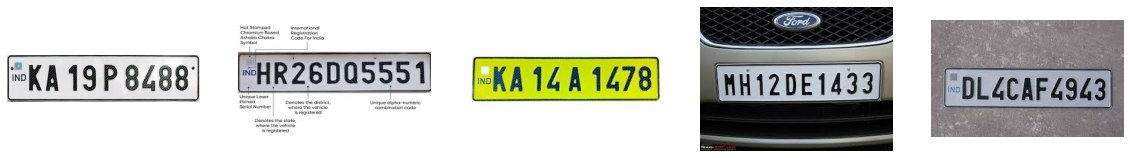

In [39]:
import matplotlib.pyplot as plt
from skimage import io

Display_Images= all_imgs[0:5]
figure, axes = plt.subplots(1,5)

print(type(axes))
figure.set_figwidth(20)
   
for ax,image in zip(axes, Display_Images):
    ax.imshow(io.imread(image), cmap=None)
    ax.axis('off')

In [40]:
#importing the libraries we need
# !sudo apt install tesseract-ocr
# !pip install pytesseract

import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow

def image_processing(image_path):

  #Taking in our image input and resizing its width to 300 pixels
  image = cv2.imread(image_path)
  image = imutils.resize(image, width=300 )
 
  #Converting the input image to greyscale

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  

  #Reducing the noise in the greyscale image

  gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 


  #Detecting the edges of the smoothened image

  edged = cv2.Canny(gray_image, 30, 200) 
  

  #Finding the contours from the edged image

  cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  image1=gray_image.copy()
  cv2.drawContours(image1,cnts,-1,(0,255,0),3)
  

  #Sorting the identified contours

  cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
  screenCnt = 0
  image2 = gray_image.copy()
  cv2.drawContours(image2,cnts,-1,(0,255,0),3)
  

  #Finding the contour with four sides and Cropping the rectangular part identified as license plate

  i=7
  for c in cnts:
          perimeter = cv2.arcLength(c, True)
          approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
          if len(approx) == 4: 
                  screenCnt = approx
          x,y,w,h = cv2.boundingRect(c)
          new_img=gray_image[y:y+h,x:x+w]
          cv2.imwrite('./'+str(i)+'.png',new_img)
          i+=1
          break

  #Drawing the selected contour on the original image

  cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)


  #Extracting text from the image of the cropped license plate usinig tessaract

  Cropped_loc = './7.png'
  plate = pytesseract.image_to_string(Cropped_loc,lang ='eng',config ='--oem 3 --psm 6')

  # Removing special Characters from the text

  bad_chars = [';', ':', '!', "*","”","“"]
  text = plate

  # using filter() to  remove bad_chars
  text = ''.join((filter(lambda i: i not in bad_chars,text)))
  text = text.split()
  first_in_list = text[0]
  state = state_dictionary[first_in_list[:2]]
  text = " ".join(line.strip() for line in plate.splitlines()) 
  return text,state


# path = '/content/drive/MyDrive/Indian Licence Plate/image2.jfif'
# image_processing(path)  

In [41]:
import os

path_for_license_plates = "/content/drive/MyDrive/Indian Licence Plate/*.jfif"

list_license_plates = []
predicted_license_plates = []
#l=[]
i = 1
file = open('output.txt','w')
for path_to_license_plate in glob.glob(path_for_license_plates, recursive = True):
    try:  
      license_plate_file = path_to_license_plate.split("/")[-1]
      license_plate, _ = os.path.splitext(license_plate_file)        
      '''
      Read each license plate image file using openCV
      '''
      # img = cv2.imread(path_to_license_plate)

      '''
      We then pass each license plate image file to the Tesseract OCR engine using the Python library wrapper for it.
      We get back predicted_result for license plate. We append the predicted_result in a list and compare it with the original the license plate
      '''      
      text,state = image_processing(path_to_license_plate)
      #l=l.append([text,state])
      # file.write("It allows us to write in a particular file")
      file.write(f"\n {i} Number_plate : {text}  state:  {state}")
      
      i +=1
    except Exception as e:
      continue 
file.close()